<div align ="right">Thomas Jefferson University <b>COMP 103</b>: Intro to Visualization</div>

# Intro to Visualization Final Activity

We've made it this far, congratulations! I hope at this point that you are feeling confident in your ability to deploy python and matplotlib to create informative and attractive data visualizations! You should feel like you have a new tool in your scientific toolkit. I **also** hope that that this semester's activities have helped to reinforce some of your other python skills. The more you practice with things like loops, conditionals, and the various python data structures (lists, dictionaries, and dataframes) the less daunting they seem. As I've said many times, you can always look up the syntax again later, but every time you complete one of these notebooks you are building up base skills in computational thinking that I think will allow you to problem-solve in your own projects someday. 

So let's give you a chance to show off!

I've included a dataset in this folder called `BioMar.csv`. Your challenge is to summarize that data set using visualizations to create a set of figures that tell the 'story' of the data as you see it. Within the data folder I have included a an article (along with its supplementary data file) that describes this recent data from the marine zone of Area de Conservación Guanacaste (you'll see on the first page of the paper that this is part of a special issue of the journal Biotropica that I was involved in producing). The paper is describing the results of a new biodiversity surveying effort. The main concern is documenting previously undocumented marine species within the conservation area. 

Your answer should include AT LEAST one each of: 

* pie chart
* histogram
* bar plot
* scatter plot 
* box plot* 
* heat map 
* annotated figure
* multi-plot layout

and for each individual plot that you make your code should export the figure as a .pdf file named `LastName_Fig_X.pdf` where `LastName` is your last name and `X` is the number for each figure. 

The data that I have given you is drawn from the tables in the paper and the supplementary material. 

    Biomar_samples:  the total organisms collected from within the particular taxonomic group 
    
    Biomar_species:  the number of unique species found in the sample
    
    Poss_New_species: species in the sample that are undescribed (new to science) 
    
    New_to_ACG:  speciesin the sample not previously known to occur in ACG 	
    
    New_to_Costa_Rica:  species in the sample not previously known to occur in Costa Rica 	
  
    Total_species_ACG:  previous species count know to occur in ACG plus 'New_to_ACG'



Two further notes: 

1. You don't have all the variables that you need to plot in order to answer some obvious questions. For example, you don't know how many species had been documented for the ACG before this effort, *but* you can calculate it given what you have.

2. There are a few rows in the data that need to be handled differently than others. For example, there is a row for the TOTAL number of Crustaceans. We need that because the data on Total_species_ACG isn't broken down into subgroups. So for some comparisons you will have to use some subsets of the rows and for other comparisons you will have to add up different subsets. I'll let you figure out how to do this, but do this subsetting within python to practice your pandas skills (in other words, don't just go into Excel and make two separate datasets -- even this would probably be the easiest thing to do). 


\* The box plot will be the hardest thing to figure out. For this in particular you may want to think about how you can create different values by combining the existing columns in different ways. For example, you may want to plot some variables that aren't just driven by the large differences in sample size.  


In [1]:
###

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv("data/BioMar.csv")
phyla = df[~df['Taxonomic _group'].str.contains("_") | df['Taxonomic _group'].str.contains("TOTAL")]
samples = df[~df['Taxonomic _group'].str.contains("TOTAL")]
print(phyla)

       Taxonomic _group  Biomar_samples  Biomar_species  Poss_New_species  \
0            Cyanophyta              11               5                 3   
1           Chlorophyta              45              19                 1   
2            Ochrophyta              37              23                 6   
3            Rhodophyta             137              62                 5   
4              Porifera             167              18                 6   
10             Mollusca             706             166                 5   
11             Annelida             536              70                10   
12             Nemertea              25               5                 5   
13          Kinorhyncha               7               4                 4   
14        Gastrotrichia               9               9                 4   
15          Brachiopoda               1               1                 0   
16            Phoronida               1               1                 0   

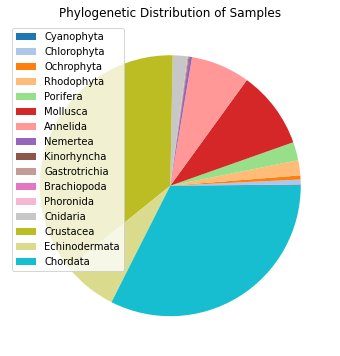

In [16]:
# pie chart: distribution of samples by phyla
from matplotlib import cm
cs=cm.tab20(np.arange(16)/16.)
fig = plt.figure(figsize=(8,6))
pie_labels = phyla["Taxonomic _group"].str.replace("_TOTAL","")
plt.pie(phyla["Biomar_samples"], colors=cs)
plt.legend(pie_labels, loc="upper left")
plt.title("Phylogenetic Distribution of Samples")
plt.show()
fig.savefig('Isaac_Fig_Pie.pdf', dpi=10)

# Finished? Yes

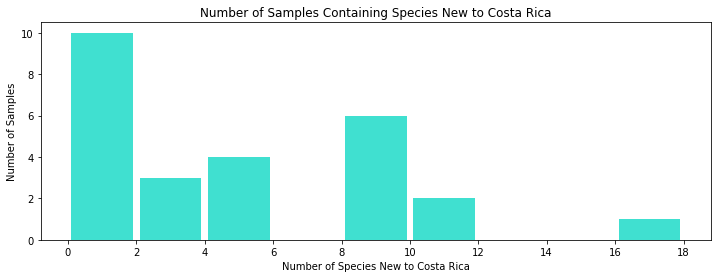

In [3]:
# histogram: distribution of samples with species new to costa rica
fig = plt.figure(figsize=(12,4))  
hist = samples["New_to_Costa_Rica"]
plt.hist(hist, 9, rwidth =0.9, color = 'turquoise')
plt.xticks([0,2,4,6,8,10,12,14,16,18])
plt.ylabel('Number of Samples')
plt.xlabel('Number of Species New to Costa Rica')
plt.title("Number of Samples Containing Species New to Costa Rica")
plt.show()
fig.savefig('Isaac_Fig_Histogram.pdf', dpi=10)

# Finished? yes

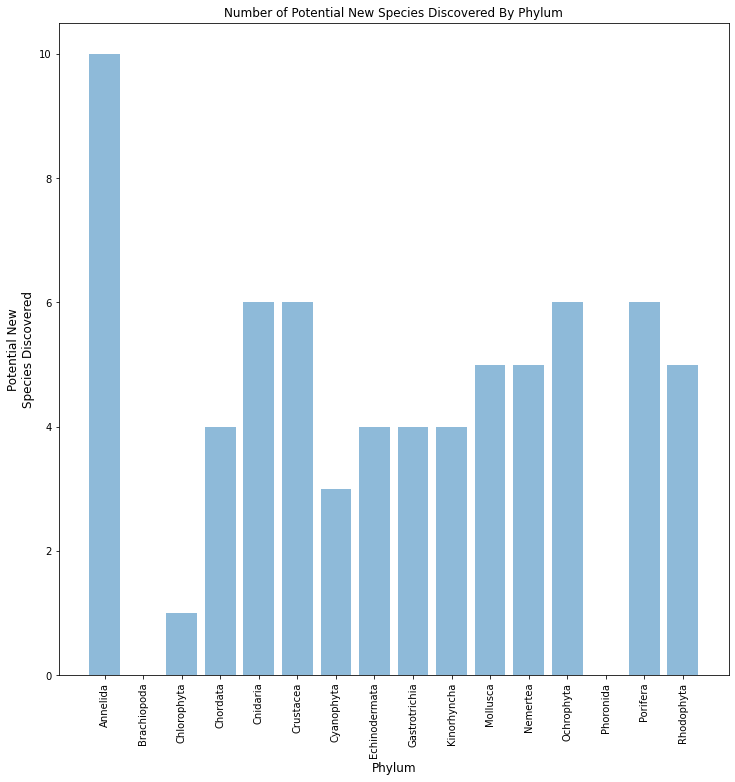

In [15]:
# bar plot: number of new species discovered by phyla
pdict = {
    'Phylum' : phyla["Taxonomic _group"],
    'New': phyla["Poss_New_species"]
}
phyla_df = pd.DataFrame(pdict)
bar = phyla_df.groupby(["Phylum"])["New"].describe()
x2 = range(len(phyla))
y2 = bar["mean"]
x2ticks_lab = bar.index.str.replace("_TOTAL","")
error = bar['std']

fig = plt.figure(figsize=(12,12))  
plt.bar(x2, y2, yerr = error, alpha = 0.5, capsize =10,)
plt.xticks(x2, x2ticks_lab, rotation="vertical") 
plt.ylabel('Potential New\nSpecies Discovered', size = 12)
plt.xlabel('Phylum', size = 12)
plt.title('Number of Potential New Species Discovered By Phylum', size = 12)
plt.show()
fig.savefig('Isaac_Fig_Bar.pdf', dpi=10)

# Finished? yes

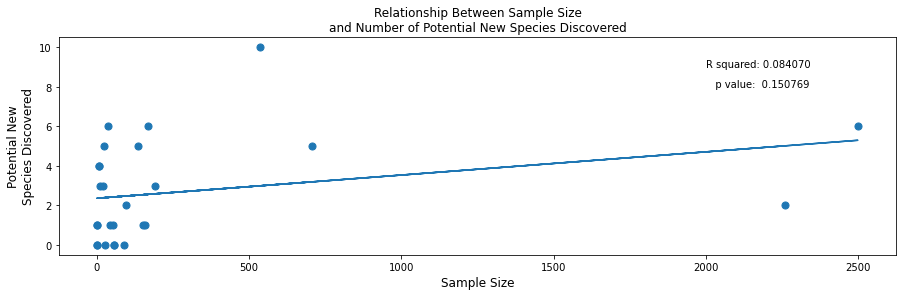

In [5]:
# scatter plot: number of new species discovered depending on sample size
from scipy import stats 
x = samples["Biomar_samples"]
y = samples["Poss_New_species"]

fig = plt.figure(figsize=(15,4))
plt.scatter(x,y,s = 50)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x + intercept
plt.plot(x, line)
plt.text(2000,9,('R squared: %f'% r_value**2))
plt.text(2000,8,('   p value:  %f'% p_value))

plt.title("Relationship Between Sample Size\nand Number of Potential New Species Discovered")
plt.ylabel('Potential New\nSpecies Discovered', size = 12)
plt.xlabel('Sample Size', size = 12)
plt.show()
fig.savefig('Isaac_Fig_Scatter.pdf', dpi=10)

# Finished? yes

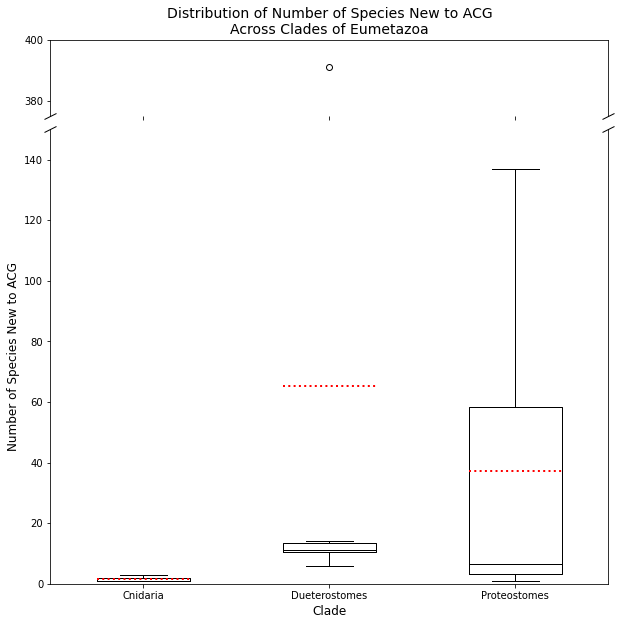

In [6]:
# box plot: number of new species to ACG by Clades Within Eumetazoa
fig, ax = plt.subplots(2,1, figsize=(10,10), sharex = True, gridspec_kw={'height_ratios': [1,6], 'hspace':0.05})
#Cnidaria
Cni = df[df['Taxonomic _group'].str.contains("Cnidaria") & ~df['Taxonomic _group'].str.contains("TOTAL")]
#Deuterostomes (Chordata and Echinodermata)
Due = df[df['Taxonomic _group'].str.contains("Chordata") & ~df['Taxonomic _group'].str.contains("TOTAL")
         | df['Taxonomic _group'].str.contains("Echinodermata") & ~df['Taxonomic _group'].str.contains("TOTAL")]
#Protostomes (Mollusca, Annelida, Nemertia, Kinoryncha, Gastrotrichia, Brachiopoda, Phoronida, Crustacea)
Pro = df[df['Taxonomic _group'].str.contains("Mollusca") & ~df['Taxonomic _group'].str.contains("TOTAL")
         | df['Taxonomic _group'].str.contains("Annelida") & ~df['Taxonomic _group'].str.contains("TOTAL")
         | df['Taxonomic _group'].str.contains("Nemertia") & ~df['Taxonomic _group'].str.contains("TOTAL")
         | df['Taxonomic _group'].str.contains("Kinorhyncha") & ~df['Taxonomic _group'].str.contains("TOTAL")
         | df['Taxonomic _group'].str.contains("Gastrotrichia") & ~df['Taxonomic _group'].str.contains("TOTAL")
         | df['Taxonomic _group'].str.contains("Brachiopoda") & ~df['Taxonomic _group'].str.contains("TOTAL")
         | df['Taxonomic _group'].str.contains("Phoronida") & ~df['Taxonomic _group'].str.contains("TOTAL")
         | df['Taxonomic _group'].str.contains("Crustacea") & ~df['Taxonomic _group'].str.contains("TOTAL")]

boxes = [Cni["New_to_ACG"], Due["New_to_ACG"], Pro["New_to_ACG"]]
xticks_lab = ['Cnidaria', 'Dueterostomes', 'Proteostomes']
median_line = {'color':'black'}
mean_line = {'color':'red',
             'linestyle':'dotted',
             'linewidth': 2}
ax[0].boxplot(boxes , widths = 0.5, showmeans = True, meanline = True, meanprops = mean_line, medianprops = median_line)
ax[1].boxplot(boxes , widths = 0.5, showmeans = True, meanline = True, meanprops = mean_line, medianprops = median_line)
ax[0].set_ylim(375,400)  # outliers only
ax[1].set_ylim(0,150)
ax[0].spines['bottom'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[0].set_yticks([380,400])
ax[0].set_xticks([])
plt.xticks([1,2,3], xticks_lab, fontsize = 10)
ax[1].set_ylabel('Number of Species New to ACG', fontsize = 12)
ax[1].set_xlabel('Clade', fontsize = 12)
ax[0].set_title('Distribution of Number of Species New to ACG\nAcross Clades of Eumetazoa', fontsize = 14)

d = 0.5
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax[0].plot([0, 1], [0, 0], transform=ax[0].transAxes, **kwargs)
ax[1].plot([0, 1], [1, 1], transform=ax[1].transAxes, **kwargs)

plt.show()

fig.savefig('Isaac_Fig_Box.pdf', dpi=10)
# Finished? yes

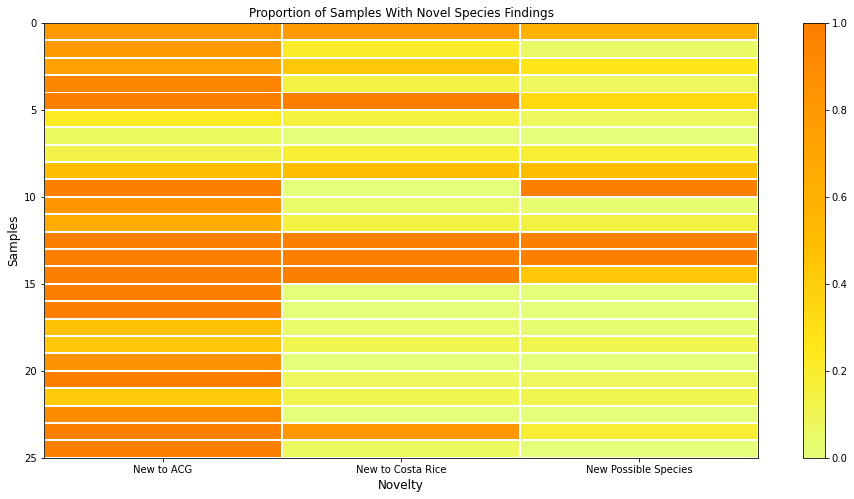

In [7]:
# heat map: Proportions of Species New to Costa Rica
Poss = []
for i in range(len(samples["Poss_New_species"])-1):
    Poss.append(samples["Poss_New_species"][i]/samples["Biomar_species"][i])
ACG = []
for i in range(len(samples["Poss_New_species"])-1):
    ACG.append(samples["New_to_ACG"][i]/samples["Biomar_species"][i])
CR = []
for i in range(len(samples["Poss_New_species"])-1):
    CR.append(samples["New_to_Costa_Rica"][i]/samples["Biomar_species"][i])

species = pd.DataFrame(
    {'New to ACG': ACG,
     'New to Costa Rice': CR,
     'New Possible Species': Poss
    })

fig = plt.figure( figsize = (16,8))
ax = plt.subplot()
plt.pcolormesh(species, cmap = 'Wistia', edgecolor = 'white')
ax.invert_yaxis()
#plt.yticks([])
plt.ylabel('Samples', size = 12)
plt.xlabel('Novelty', size = 12)
plt.xticks(np.linspace(0.5, len(species.columns)-0.5, len(species.columns)), species.columns)
plt.title('Proportion of Samples With Novel Species Findings')
plt.colorbar()
plt.show()

fig.savefig('Isaac_Fig_Heat.pdf', dpi=10)
# Finished? yes

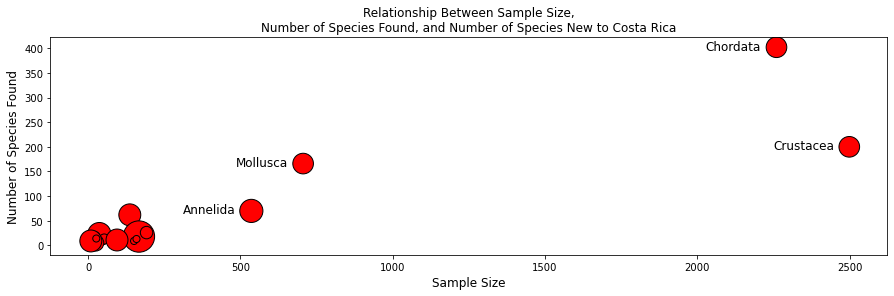

In [8]:
# annotated figure
x = samples["Biomar_samples"]
y = samples["Biomar_species"]
z = samples["New_to_Costa_Rica"]
c0 = samples["Taxonomic _group"].str.replace("_Actinopterygii","")
c = c0.str.replace("_Decapoda","")


fig = plt.figure(figsize=(15,4))
plt.scatter(x,y,s = 50*z**1.03, c = "red", edgecolors = "black")

for i in range(len(x)):
    if x[i] > 500:
        plt.text(x[i]-50,y[i]-5,c[i], fontsize = 12, horizontalalignment='right')

plt.title("Relationship Between Sample Size,\nNumber of Species Found, and Number of Species New to Costa Rica")
plt.ylabel('Number of Species Found', size = 12)
plt.xlabel('Sample Size', size = 12)
plt.show()
fig.savefig('Isaac_Fig_Annotated.pdf', dpi=10)

# Finished? yes

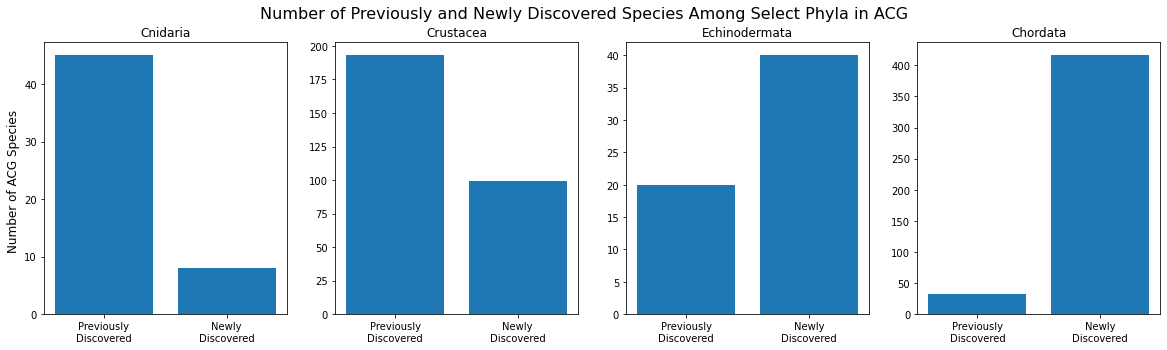

In [9]:
# multi-plot layout
totals = df[df['Taxonomic _group'].str.contains("TOTAL")]

new = totals["New_to_ACG"]
old = totals["Total_species_ACG"]-totals["New_to_ACG"]
select = totals["Taxonomic _group"]

fig, ax = plt.subplots(1,4, figsize=(20,5), sharex = True)

for i in range(len(totals)):
    ax[i].bar([1,2], [old.iloc[i],new.iloc[i]])
    ax[i].set_title(totals.iloc[i]["Taxonomic _group"].replace("_TOTAL",""), fontsize = 12)
ax[0].set_ylabel('Number of ACG Species ', fontsize = 12)
ax[0].set_xticks([1,2])
ax[0].set_xticklabels(["Previously\nDiscovered","Newly\nDiscovered"])
fig.suptitle("Number of Previously and Newly Discovered Species Among Select Phyla in ACG", fontsize = 16)

plt.show()

fig.savefig('Isaac_Fig_Multi.pdf', dpi=10)
# Finished? yes


![TJU logo](images/TJU_logo_image.png "TJU logo")

